In [789]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



EDA Import Data And Explore

In [790]:
data = pd.read_csv('housing.csv')
data.shape

(20640, 10)

In [791]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [792]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [793]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [794]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [795]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [796]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis = 1) #  axis = 1 need it every time to drop colume
y = data['median_house_value']

In [797]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [798]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [799]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20516,-121.52,38.57,43.0,2360.0,471.0,1041.0,452.0,2.8900,INLAND,86200.0
7752,-118.15,33.92,30.0,915.0,234.0,646.0,211.0,2.5208,<1H OCEAN,182800.0
1473,-122.03,37.97,45.0,1613.0,338.0,865.0,336.0,3.2500,NEAR BAY,151100.0
11831,-120.58,39.27,15.0,4126.0,903.0,723.0,266.0,3.0147,INLAND,118800.0
8475,-118.32,33.91,34.0,1068.0,198.0,757.0,231.0,5.7528,<1H OCEAN,180500.0
...,...,...,...,...,...,...,...,...,...,...
16029,-122.44,37.73,46.0,3581.0,758.0,1670.0,703.0,4.1932,NEAR BAY,269200.0
15762,-122.43,37.77,52.0,1567.0,482.0,654.0,425.0,2.6914,NEAR BAY,366700.0
17865,-121.89,37.42,26.0,40.0,8.0,52.0,7.0,7.7197,<1H OCEAN,225000.0
3662,-118.38,34.25,38.0,983.0,185.0,513.0,170.0,4.8816,<1H OCEAN,231500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

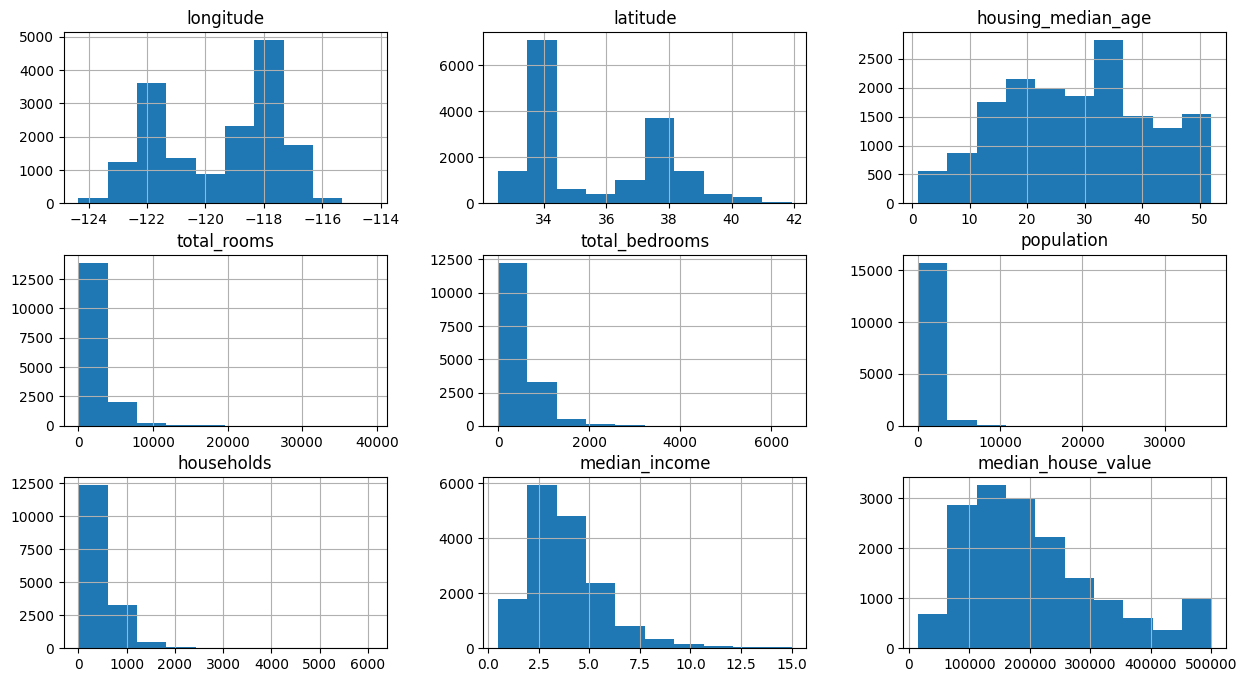

In [800]:
train_data.hist(figsize=(15, 8))

<Axes: >

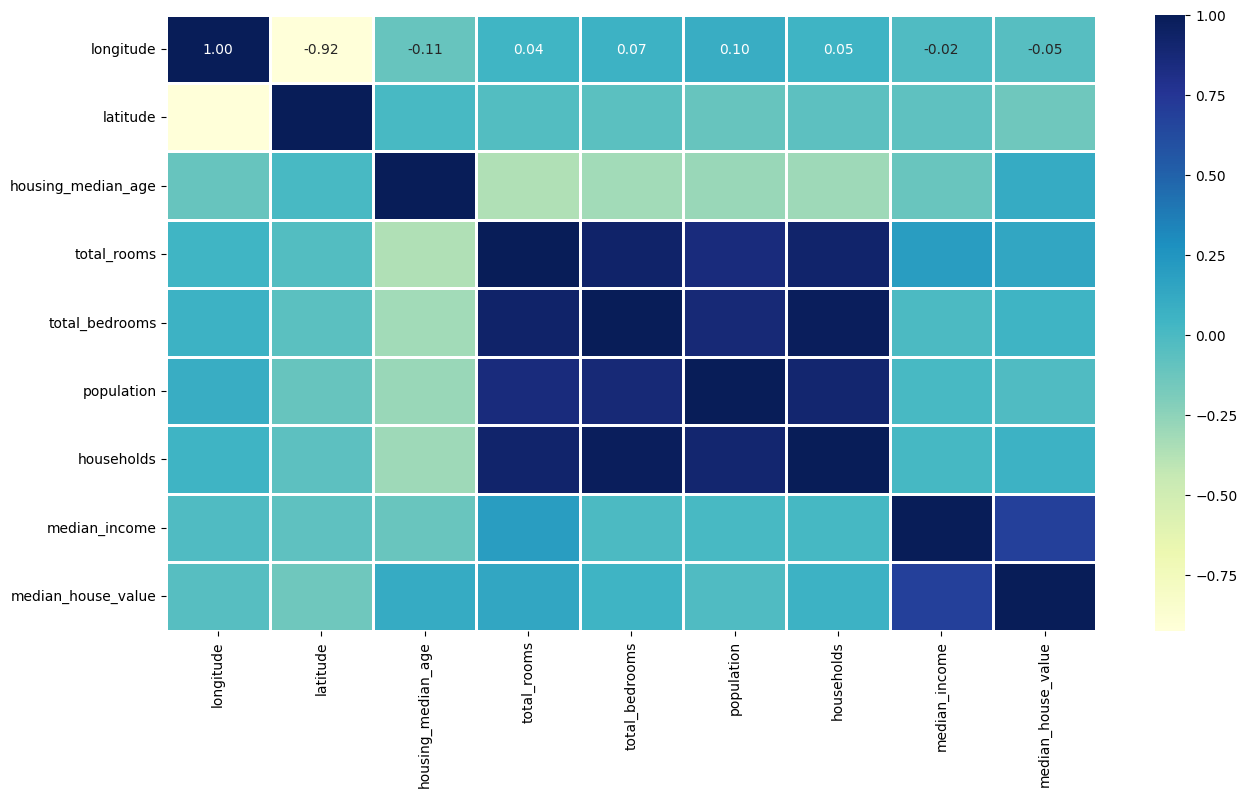

In [801]:
train_data.select_dtypes(include=['number']).corr() # ...select_dtypes(include=['number']) to select only numeric columns
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap='YlGnBu',fmt='.2f', linewidth = 1)

In [802]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1 )
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1 )
train_data['population'] = np.log(train_data['population'] + 1 )
train_data['households'] = np.log(train_data['households'] + 1 )

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

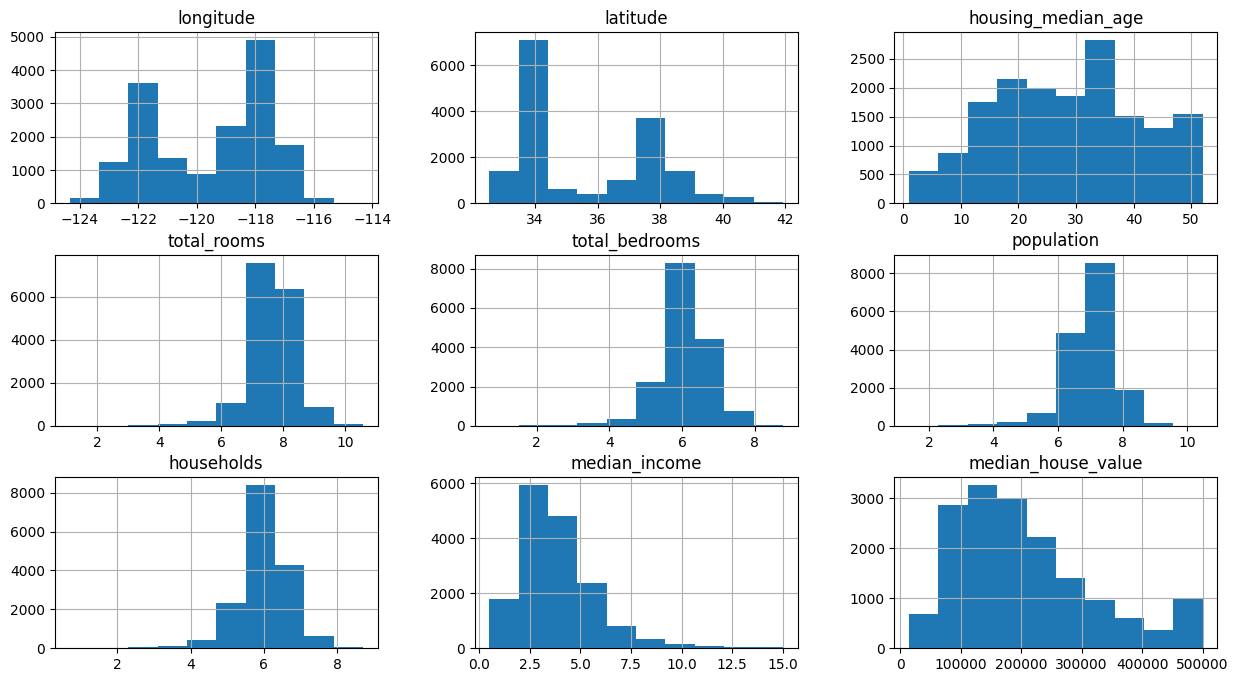

In [803]:
train_data.hist(figsize=(15, 8))			

In [804]:
train_data = X_train.join(y_train) # rejoin the data to readd 'ocean_proximity'
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7188
INLAND        5206
NEAR OCEAN    2123
NEAR BAY      1827
ISLAND           2
Name: count, dtype: int64

In [805]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'], dtype= 'int')).drop(['ocean_proximity'], axis=1)

In [806]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20516,-121.52,38.57,43.0,2360.0,471.0,1041.0,452.0,2.8900,86200.0,0,1,0,0,0
7752,-118.15,33.92,30.0,915.0,234.0,646.0,211.0,2.5208,182800.0,1,0,0,0,0
1473,-122.03,37.97,45.0,1613.0,338.0,865.0,336.0,3.2500,151100.0,0,0,0,1,0
11831,-120.58,39.27,15.0,4126.0,903.0,723.0,266.0,3.0147,118800.0,0,1,0,0,0
8475,-118.32,33.91,34.0,1068.0,198.0,757.0,231.0,5.7528,180500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16029,-122.44,37.73,46.0,3581.0,758.0,1670.0,703.0,4.1932,269200.0,0,0,0,1,0
15762,-122.43,37.77,52.0,1567.0,482.0,654.0,425.0,2.6914,366700.0,0,0,0,1,0
17865,-121.89,37.42,26.0,40.0,8.0,52.0,7.0,7.7197,225000.0,1,0,0,0,0
3662,-118.38,34.25,38.0,983.0,185.0,513.0,170.0,4.8816,231500.0,1,0,0,0,0


<Axes: >

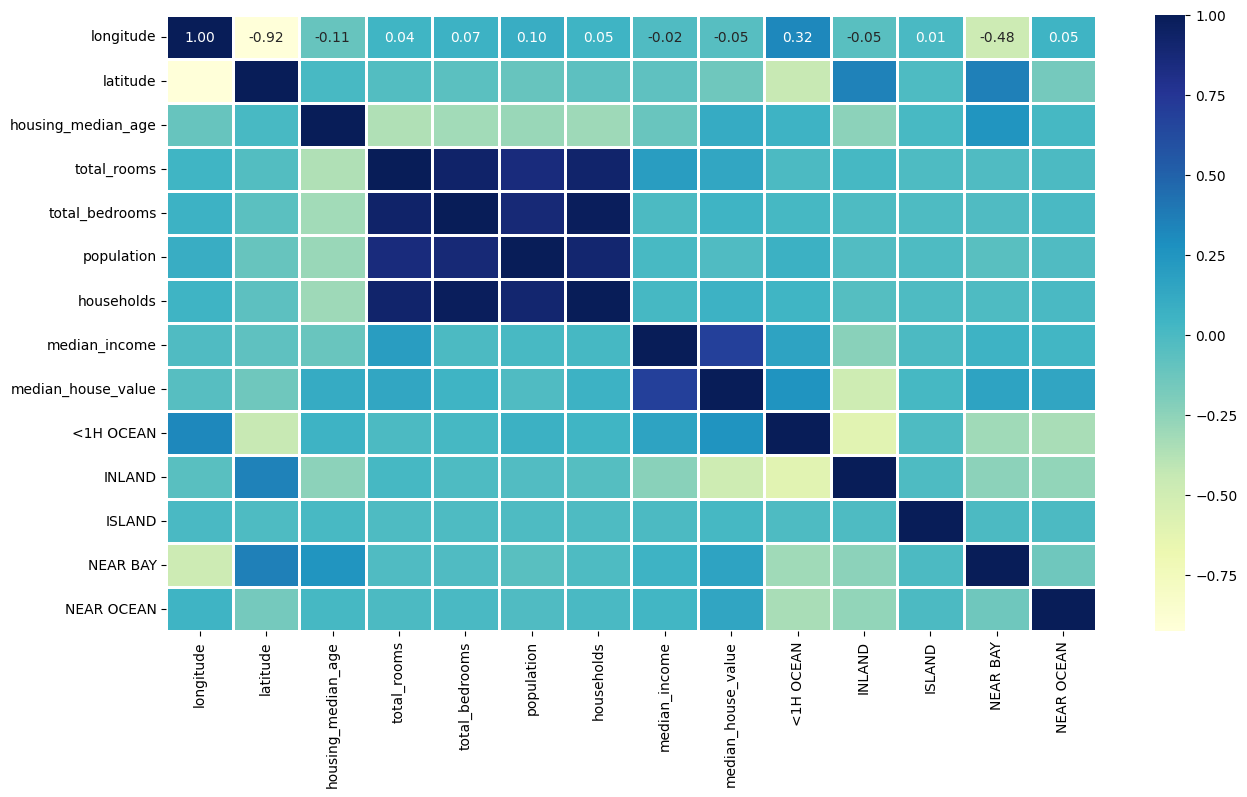

In [807]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu',fmt='.2f', linewidth = 1)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='latitude', ylabel='longitude'>

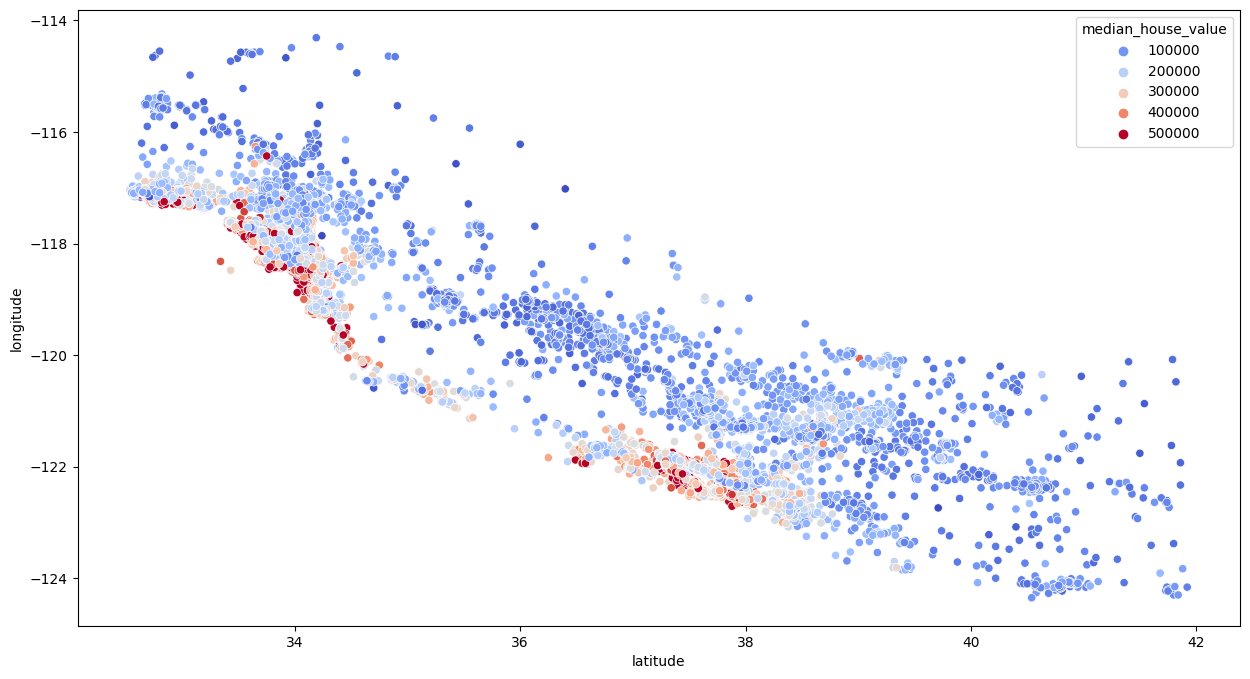

In [808]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y = 'longitude', data= train_data, hue = 'median_house_value', palette = 'coolwarm' )

In [809]:
train_data['bedrooms']= train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/ train_data['households']


<Axes: >

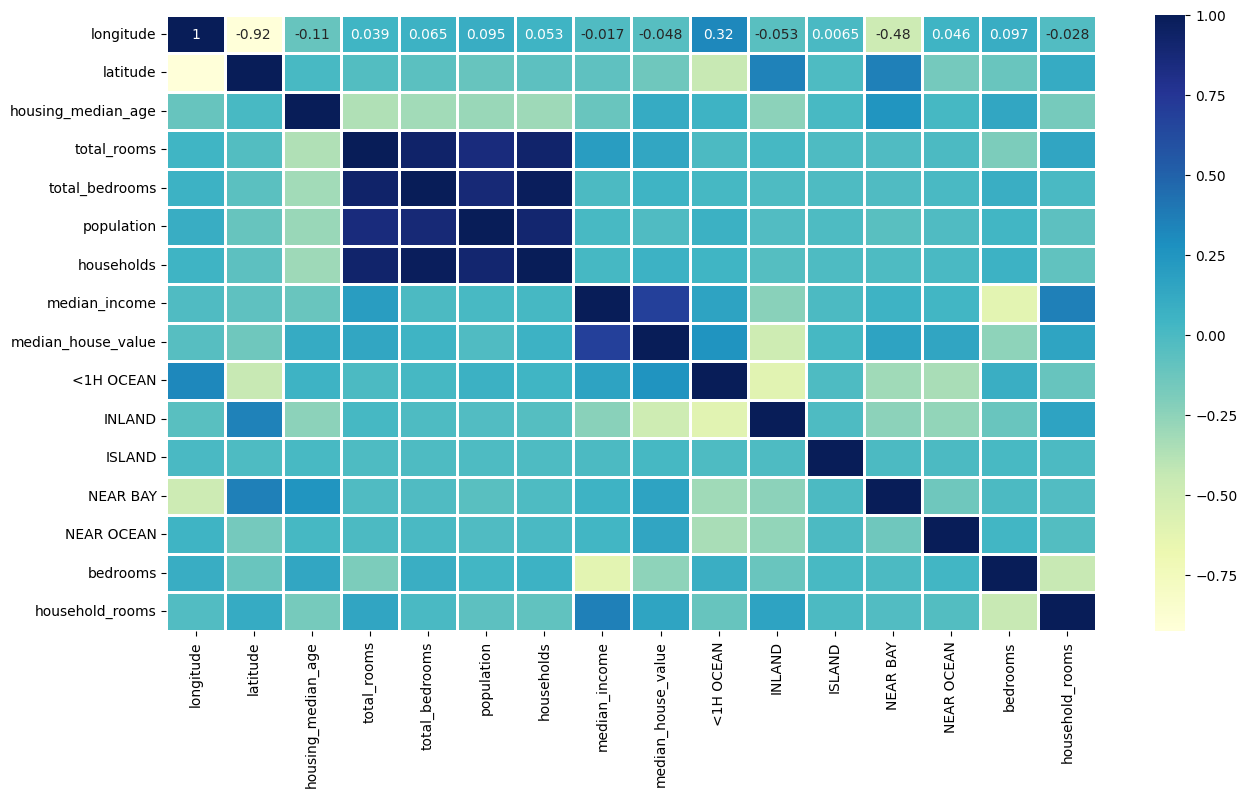

In [810]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), cmap='YlGnBu', linewidth=1, annot=True)  

In [811]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [812]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1 )
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1 )
test_data['population'] = np.log(test_data['population'] + 1 )
test_data['households'] = np.log(test_data['households'] + 1 )  


test_data=test_data.join(pd.get_dummies(test_data['ocean_proximity'], dtype= 'int')).drop(['ocean_proximity'], axis=1)

test_data['bedrooms']= test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/ test_data['households']


In [813]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms,household_rooms
20516,-121.52,38.57,43.0,2360.0,471.0,1041.0,452.0,2.8900,86200.0,0,1,0,0,0,0.199576,5.221239
7752,-118.15,33.92,30.0,915.0,234.0,646.0,211.0,2.5208,182800.0,1,0,0,0,0,0.255738,4.336493
1473,-122.03,37.97,45.0,1613.0,338.0,865.0,336.0,3.2500,151100.0,0,0,0,1,0,0.209547,4.800595
11831,-120.58,39.27,15.0,4126.0,903.0,723.0,266.0,3.0147,118800.0,0,1,0,0,0,0.218856,15.511278
8475,-118.32,33.91,34.0,1068.0,198.0,757.0,231.0,5.7528,180500.0,1,0,0,0,0,0.185393,4.623377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16029,-122.44,37.73,46.0,3581.0,758.0,1670.0,703.0,4.1932,269200.0,0,0,0,1,0,0.211673,5.093883
15762,-122.43,37.77,52.0,1567.0,482.0,654.0,425.0,2.6914,366700.0,0,0,0,1,0,0.307594,3.687059
17865,-121.89,37.42,26.0,40.0,8.0,52.0,7.0,7.7197,225000.0,1,0,0,0,0,0.200000,5.714286
3662,-118.38,34.25,38.0,983.0,185.0,513.0,170.0,4.8816,231500.0,1,0,0,0,0,0.188199,5.782353


In [814]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [815]:
X_test_s = scaler.fit_transform(X_test)

In [816]:
reg.score(X_test_s, y_test)

-1.3484357096909903e+20

In [817]:
from sklearn.ensemble import RandomForestRegressor

forest= RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [818]:
RandomForestRegressor()

RandomForestRegressor()

In [819]:
forest.score(X_test, y_test)

0.33794542233286784

In [820]:
forest.score(X_train_s, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


-0.08344894924694746

In [821]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth":[None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

In [ ]:
grid_search.best_estimator_.score(X_test_s, y_test)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 14 features, but RandomForestRegressor is expecting 15 features as input.